In [28]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.fftpack import fft, fftfreq, fftshift, ifft, rfft
from numpy import pi, real, random
from numpy.random import randn
from matplotlib.pyplot import plot, subplot

mpl.rc('figure', figsize=[16,5])

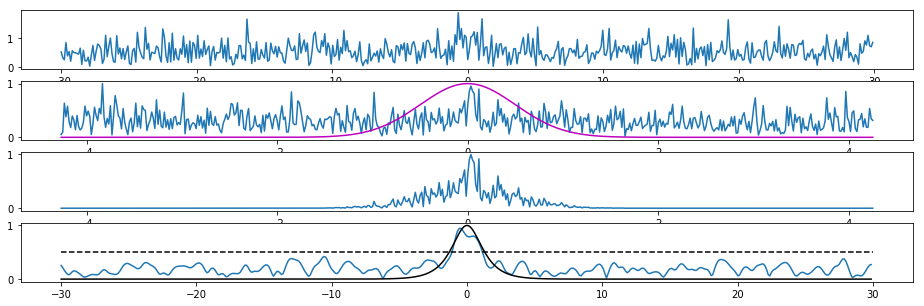

In [59]:
L = 30
n = 512
t = np.linspace(-L, L, n+1)[0:n]
k = fftfreq(n, 2*L/n)

noise = 10

flter = np.exp(-2*(k+0.0)**2)

u = np.array([1/math.cosh(x) for x in t])
ut = fft(u)
utn = ut + noise * (randn(n) + 1j * randn(n))
utnf = utn * flter
un = ifft(utn)
unf = ifft(utnf)

subplot(411)
plot(t, abs(un))

subplot(412)
plot(fftshift(k), fftshift(abs(utn)/max(abs(utn))), 
     fftshift(k), fftshift(flter), 'm')

subplot(413)
plot(fftshift(k), fftshift(abs(utnf)/max(abs(utnf))))

subplot(414)
plot(t, abs(unf), t, u, 'k', [-30, 30], [0.5, 0.5], 'k--')
